<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<center><h1 style="font-size:2em;color:#2467C0"> Color rojo en una imagen
 </h1></center>
<br>
<table>
<col width="650">
<col width="350">
<tr>
<td><img src="figuras/color_rojo.png" align="middle" style="width:850px;"/></td>
<td>
    
    
**Objetivo:**
    
    
Resaltar el color rojo en una imagen.
<br>
</td>
</tr>
</table>

# Cargar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

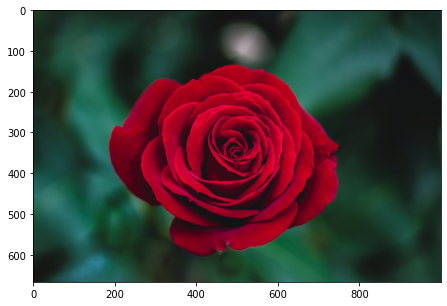

In [2]:
#Mostramos la imagen original
img = cv.imread('figuras/rosa.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(8,5))
plt.imshow(img)
plt.show()

In [3]:
#Llevamos a cabo el cambio de espacio de color y definimos las dos regiones para el rojo
img = cv.imread('figuras/rosa.jpg')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lower_red1 = np.array([0,100,100])
upper_red1 = np.array([5,255,255])
lower_red2 = np.array([170,100,100])
upper_red2 = np.array([180,255,255])

In [4]:
#Aplicamos la mascara de cada región
mask1 = cv.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv.inRange(img_hsv, lower_red2, upper_red2)
mask_red = cv.add(mask1, mask2)

In [5]:
#Revisamos los valores de los pixeles
uniqueValues, occurCount = np.unique(mask_red , return_counts=True)
print("Valores : " , uniqueValues)
print("Ocurrencia : ", occurCount)

Valores :  [  0 255]
Ocurrencia :  [533146 133854]


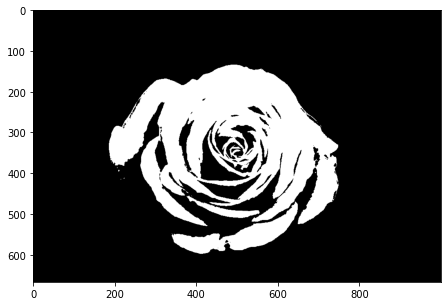

In [6]:
# Visualizamos la mascara
plt.figure(figsize=(8,5))
plt.imshow(mask_red,cmap='gray')
plt.show()

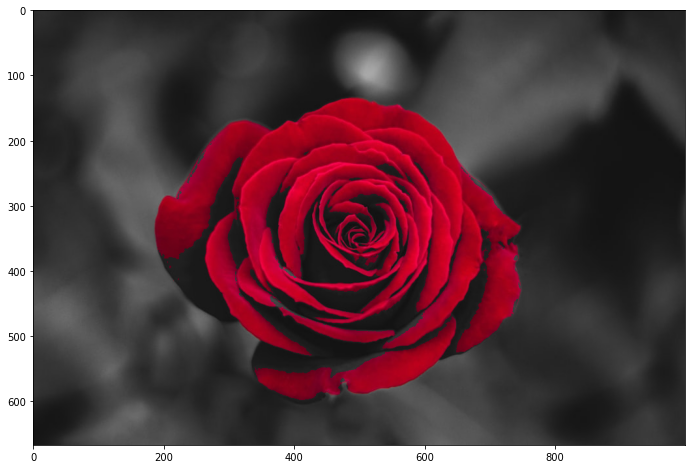

In [7]:
#Resaltando un color en una imagen
img = cv.imread('figuras/rosa.jpg')
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_grey[np.where(mask_red==255)] = 0
img_gray_rgb = cv.cvtColor(img_grey,cv.COLOR_GRAY2RGB)
output_img = img.copy()
output_img[np.where(mask_red==0)] = 0
img_final=cv.add(img_gray_rgb, output_img )
plt.figure(figsize=(13,8))
img_final=cv.cvtColor(img_final, cv.COLOR_BGR2RGB)
plt.imshow(img_final)
plt.show()

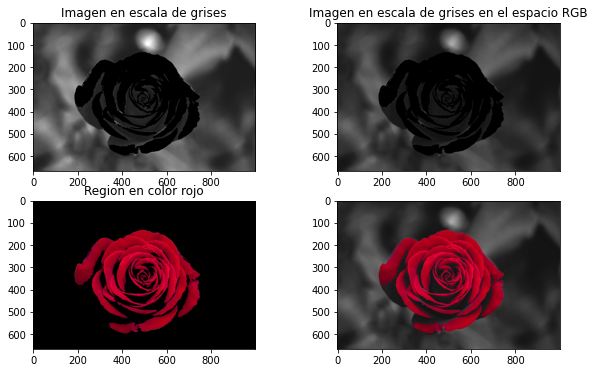

In [8]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.imshow(img_grey,cmap='gray')
plt.title("Imagen en escala de grises")
plt.subplot(2,2,2)
plt.imshow(img_gray_rgb,cmap='gray')
plt.title("Imagen en escala de grises en el espacio RGB")
plt.subplot(2,2,3)
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.title("Region en color rojo")
plt.subplot(2,2,4)
plt.imshow(img_final)
plt.show()

# Ejercicio 2

In [9]:
#definimos una función que convierta la imagen original al espacio HSV
def hsv_convert(image):
    return cv.cvtColor(img, cv.COLOR_BGR2HSV)

In [10]:
#definimos una función que retorne la mascara para el color rojo
def f_mask_red(image):
    lower_red1 = np.array([0,100,100])
    upper_red1 = np.array([5,255,255])
    lower_red2 = np.array([170,100,100])
    upper_red2 = np.array([180,255,255])
    img_hsv=hsv_convert(img)
    mask1 = cv.inRange(img_hsv, lower_red1, upper_red1)
    mask2 = cv.inRange(img_hsv, lower_red2, upper_red2)
    mask_red = cv.add(mask1, mask2)
    return mask_red

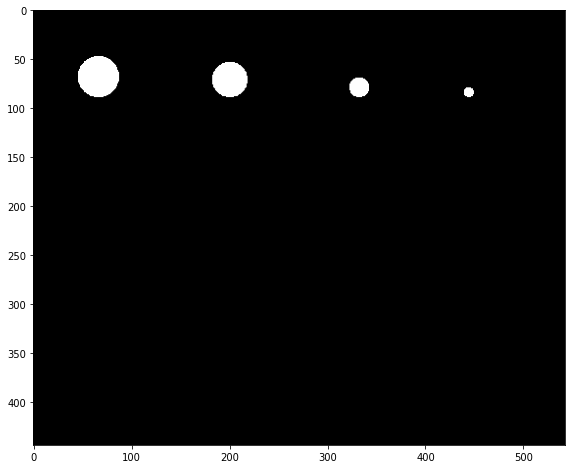

In [11]:
#Aplicación de la mascara en la imagen original
img = cv.imread('figuras/circulos.jpg')

mask_red = f_mask_red(img)

plt.figure(figsize=(13,8))
plt.imshow(mask_red, cmap='gray')
plt.show()

In [12]:
# Encontrando las circunferencias con la función HoughCircles
red_circles = cv.HoughCircles(mask_red, cv.HOUGH_GRADIENT, 1, 80, param1=50, param2=10, minRadius=0, maxRadius=30)
print(red_circles)

[[[199.5  69.5  18.3]
  [ 67.5  67.5  20.2]
  [332.5  77.5   9.6]
  [444.5  83.5   5.2]]]


In [13]:
# Verificamos que las circunferencias cumplan con que el área cercana al centro sea solida
font = cv.FONT_HERSHEY_SIMPLEX
region = 5
if red_circles is not None:
    red_circles = np.uint16(np.around(red_circles))
    for i in red_circles[0, :]:
        pixel_value = 0.0
        n = 0.0
        for j in range(-region, region):
            for k in range(-region, region):
                pixel_value += mask_red[i[1]+j, i[0]+k]
                n += 1

        print("pixel_value/n",pixel_value/n)
        if pixel_value/n > 50:
            cv.circle(img, (i[0], i[1]), i[2]+10, (0, 0, 255), 2)
            cv.putText(img,'Rojo',(i[0]-i[2], i[1]-i[2]-10), font, 1,(0,0,255),2,cv.LINE_AA)

pixel_value/n 255.0
pixel_value/n 255.0
pixel_value/n 255.0
pixel_value/n 201.45


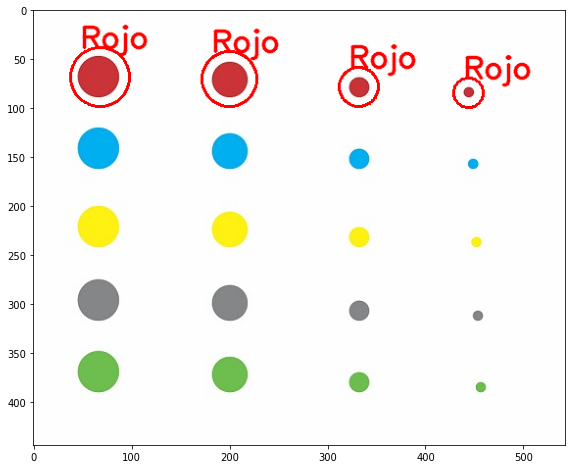

In [15]:
# Visualizamos la detección de las circunferencias rojas
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(13,8))
plt.imshow(img)
plt.show()